<a href="https://colab.research.google.com/github/Diyabaghla/Student_Placement_prediction/blob/main/Student_Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import optuna
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [9]:
data=pd.read_csv("/content/student_performance.csv")
data.head()

,IQ,CGPA,10th_Marks,12th_Marks,Communication_Skills,Placed
0,114,3.14,54,97,2.62,0
1,117,6.09,89,75,4.56,1
2,134,9.86,73,80,6.83,1
3,137,5.52,100,63,6.96,1
4,137,6.37,82,58,2.84,1


In [11]:
data.isnull().sum()

IQ                      0
CGPA                    0
10th_Marks              0
12th_Marks              0
Communication_Skills    0
Placed                  0
dtype: int64

In [12]:
data.describe()

,IQ,CGPA,10th_Marks,12th_Marks,Communication_Skills,Placed
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,111.230000,6.406600,60.500000,53.180000,4.784900,0.500000
std,23.993204,2.041801,22.451069,26.458422,2.930114,0.502519
min,70.000000,3.070000,20.000000,10.000000,0.120000,0.000000
25%,90.750000,4.802500,41.750000,31.500000,2.490000,0.000000
50%,111.500000,6.140000,59.500000,52.500000,4.550000,0.500000
75%,134.000000,8.242500,78.750000,75.250000,7.060000,1.000000
max,150.000000,9.890000,100.000000,99.000000,9.900000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IQ                    100 non-null    int64  
 1   CGPA                  100 non-null    float64
 2   10th_Marks            100 non-null    int64  
 3   12th_Marks            100 non-null    int64  
 4   Communication_Skills  100 non-null    float64
 5   Placed                100 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


<Axes: xlabel='Placed', ylabel='count'>

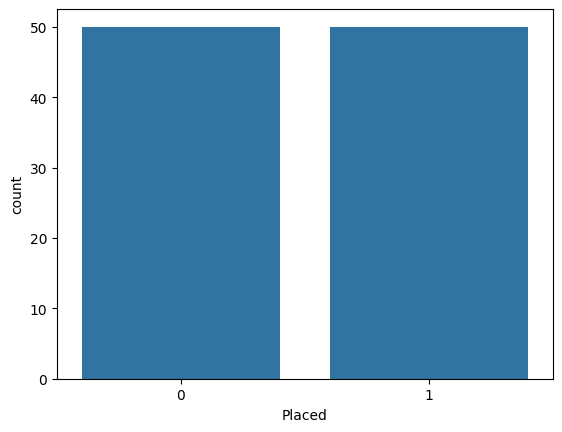

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Placed',data=data)

<Axes: >

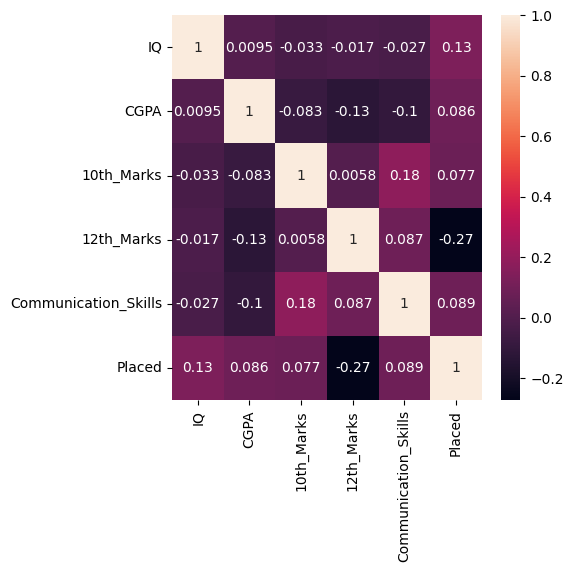

In [18]:
plt.figure(figsize=(5,5))
c=data.corr(numeric_only=True)
sns.heatmap(c,annot=True)

In [20]:
x=data.drop(['IQ','Placed'],axis=1)
y=data['Placed']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.metrics import accuracy_score
def objective(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors',1,20),
        'leaf_size': trial.suggest_int('leaf_size',10,50),
        'weights': trial.suggest_categorical('weights',['uniform','distance']),
        'metric': trial.suggest_categorical('metric',['euclidean','manhattan','minkowski']),
        'algorithm': trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute'])
      }

    model=KNeighborsClassifier(**param)
    model.fit(x_train,y_train)

    model_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,model_pred)
    return accuracy

In [30]:
import optuna
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)
print("best parameters: ",study.best_params)

[I 2024-07-07 17:07:49,462] A new study created in memory with name: no-name-dfb814ff-11d3-4a4a-be8d-52db06e09917
[I 2024-07-07 17:07:49,507] Trial 0 finished with value: 0.55 and parameters: {'n_neighbors': 3, 'leaf_size': 29, 'weights': 'uniform', 'metric': 'euclidean', 'algorithm': 'auto'}. Best is trial 0 with value: 0.55.
[I 2024-07-07 17:07:49,711] Trial 1 finished with value: 0.7 and parameters: {'n_neighbors': 17, 'leaf_size': 12, 'weights': 'uniform', 'metric': 'manhattan', 'algorithm': 'brute'}. Best is trial 1 with value: 0.7.
[I 2024-07-07 17:07:49,756] Trial 2 finished with value: 0.65 and parameters: {'n_neighbors': 15, 'leaf_size': 32, 'weights': 'distance', 'metric': 'manhattan', 'algorithm': 'kd_tree'}. Best is trial 1 with value: 0.7.
[I 2024-07-07 17:07:49,831] Trial 3 finished with value: 0.6 and parameters: {'n_neighbors': 17, 'leaf_size': 21, 'weights': 'distance', 'metric': 'manhattan', 'algorithm': 'brute'}. Best is trial 1 with value: 0.7.
[I 2024-07-07 17:07:4

best parameters:  {'n_neighbors': 19, 'leaf_size': 46, 'weights': 'uniform', 'metric': 'manhattan', 'algorithm': 'ball_tree'}


In [31]:
best_params={'n_neighbors': 19, 'leaf_size': 46, 'weights': 'uniform', 'metric': 'manhattan', 'algorithm': 'ball_tree'}

In [32]:
best_model=KNeighborsClassifier(**best_params)
best_model.fit(x,y)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=46, metric='manhattan',
                     n_neighbors=19)

In [39]:
from sklearn.metrics import accuracy_score
new=np.array([[3.14,	54,	97,	2.62],[6.09 ,89,	75,	4.56	]])
predictions=best_model.predict(new)
predictions

array([0, 1])